# Análise do Dataset Diamonds

Este notebook contém a análise e engenharia de features do conjunto de dados diamonds, que contém informações sobre mais de 50.000 diamantes.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Configurações de visualização
plt.rcParams['figure.figsize'] = [12, 8]
sns.set_style('whitegrid')

In [2]:
# Carregando o dataset
diamonds = pd.read_csv('data/diamonds.csv')
print("Dimensões do dataset:", diamonds.shape)
diamonds.head()

Dimensões do dataset: (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1. Engenharia de Features

Vamos criar novas features que podem ser úteis para prever o preço dos diamantes.

In [3]:
# 1.1 Criação do volume do diamante
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

# 1.2 Codificação ordinal das variáveis categóricas
cut_order = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_order = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_order = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

diamonds['cut_encoded'] = diamonds['cut'].map(cut_order)
diamonds['color_encoded'] = diamonds['color'].map(color_order)
diamonds['clarity_encoded'] = diamonds['clarity'].map(clarity_order)

# 1.3 Transformação logarítmica do quilate
diamonds['log_carat'] = np.log(diamonds['carat'])

# 1.4 Criação de variável binária para diamantes grandes
diamonds['is_large'] = (diamonds['carat'] > diamonds['carat'].median()).astype(int)

diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume,cut_encoded,color_encoded,clarity_encoded,log_carat,is_large
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,5,6,2,-1.469676,0
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,4,6,3,-1.560648,0
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,2,6,5,-1.469676,0
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,4,2,4,-1.237874,0
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,2,1,2,-1.171183,0


## 2. Justificativa das Novas Features

1. **Volume do Diamante**:
   - Criado multiplicando as dimensões x, y e z
   - Útil pois o preço do diamante está diretamente relacionado ao seu tamanho
   - Pode capturar melhor a relação entre dimensões e preço do que as dimensões individuais

2. **Codificação Ordinal**:
   - Transforma variáveis categóricas em numéricas mantendo a ordem de qualidade
   - Permite que o modelo capture a relação ordinal entre as categorias
   - Facilita a interpretação da importância de cada nível

3. **Log do Quilate**:
   - Aplica transformação logarítmica ao quilate
   - Útil para lidar com a não-linearidade na relação entre quilate e preço
   - Ajuda a normalizar a distribuição do quilate

4. **Variável Binária para Diamantes Grandes**:
   - Identifica diamantes acima da mediana de quilate
   - Pode capturar efeitos não-lineares no preço
   - Útil para identificar padrões específicos de preço para diamantes grandes

## 3. Visualização Exploratória

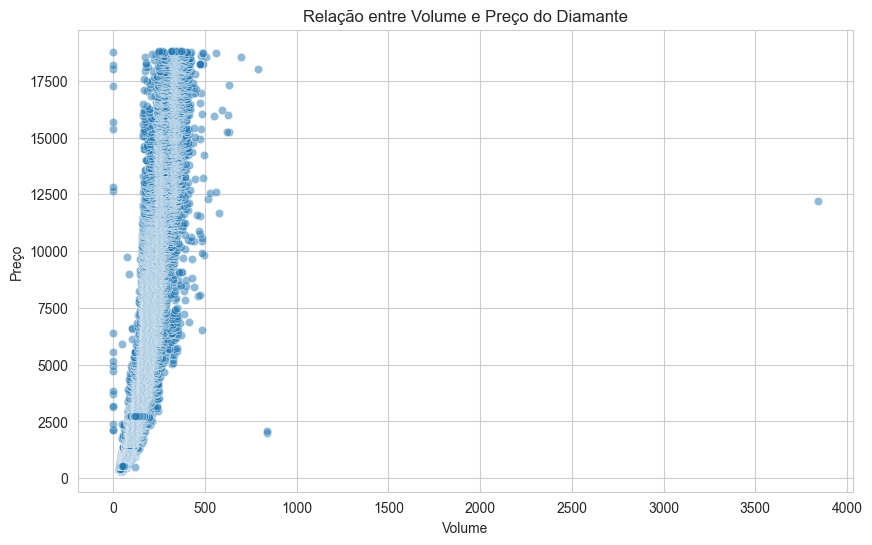

In [4]:
# 3.1 Relação entre Volume e Preço
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds, x='volume', y='price', alpha=0.5)
plt.title('Relação entre Volume e Preço do Diamante')
plt.xlabel('Volume')
plt.ylabel('Preço')
plt.show()

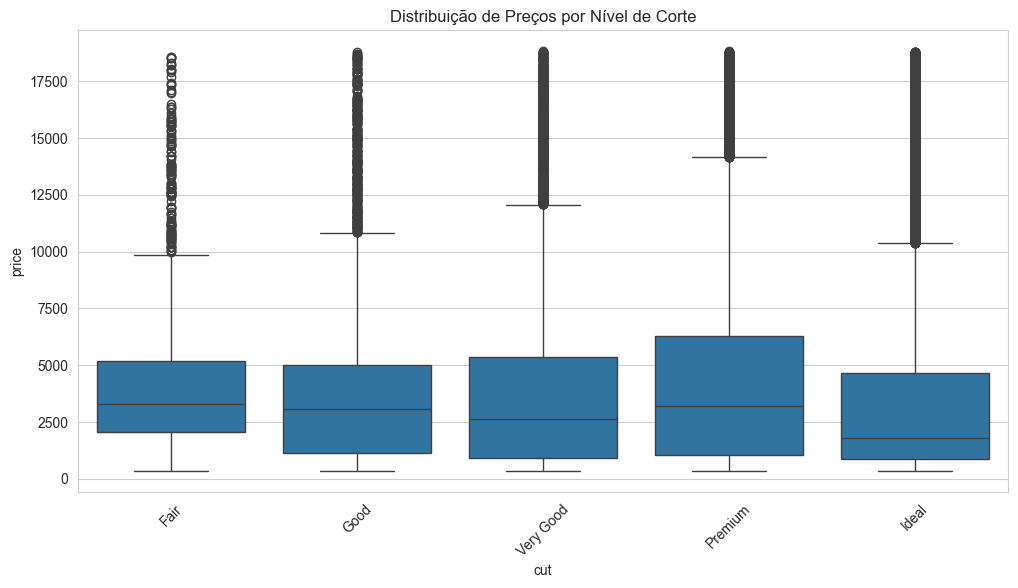

In [5]:
# 3.2 Boxplot do Preço por Nível de Corte
plt.figure(figsize=(12, 6))
sns.boxplot(data=diamonds, x='cut', y='price', order=cut_order.keys())
plt.title('Distribuição de Preços por Nível de Corte')
plt.xticks(rotation=45)
plt.show()

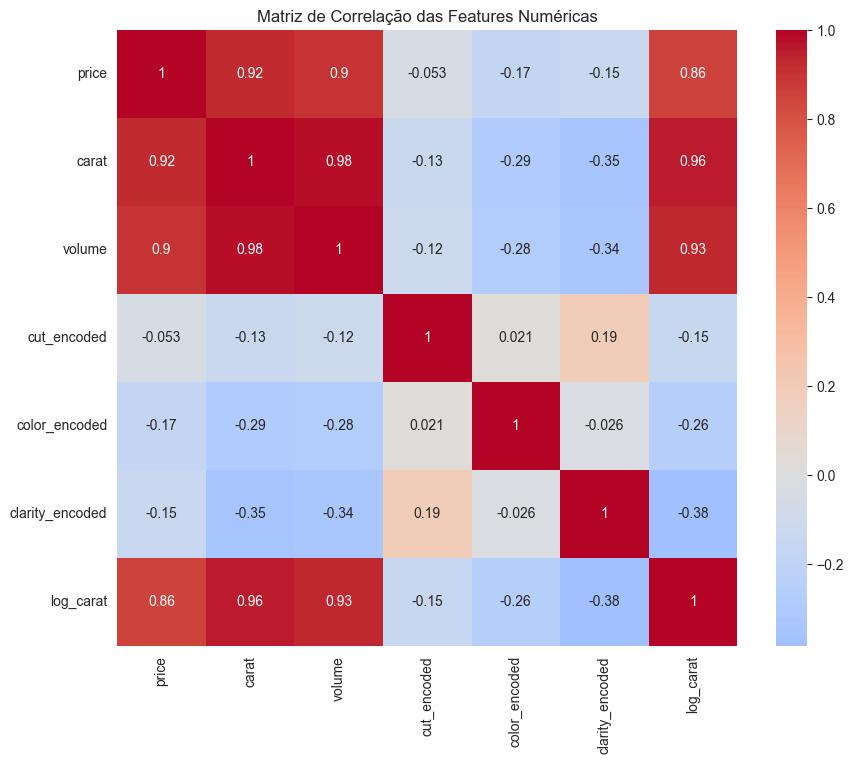

In [6]:
# 3.3 Heatmap de Correlação
numeric_cols = ['price', 'carat', 'volume', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'log_carat']
correlation = diamonds[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Features Numéricas')
plt.show()

## 4. Análise dos Resultados

A partir das visualizações e transformações realizadas, podemos observar:

1. A relação entre volume e preço mostra uma tendência positiva, indicando que o volume é uma feature relevante
2. O boxplot do preço por nível de corte mostra uma clara diferenciação entre os diferentes níveis de qualidade
3. O heatmap de correlação permite identificar quais features têm maior impacto no preço do diamante

Estas novas features podem ser utilizadas para melhorar a performance de modelos de regressão para prever o preço dos diamantes.